In [108]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from Clustering.kMeansAlg import distance,KMeansAlgForIris,AssignCluster
import logging

In [109]:
def Visualization(data,centroids):
    clussterAssigment=AssignCluster(data,centroids)
    for i in range(0,centroids.shape[0]):
        plt.figure(i)
        clusterPoints=features[np.where(clussterAssigment==i)[0]]
        plt.scatter(clusterPoints[:,0],clusterPoints[:,1])
        plt.scatter(centroids[i,0],centroids[i,1])
def VisualizationInOneGraph(data,centroids):
    clussterAssigment=AssignCluster(data,centroids)
    plt.figure()
    colormap=["red","blue","yellow","lime","purple"]
    colormapCenter=["pink","cyan","orange","green","violet"]
    for i in range(0,centroids.shape[0]):
        clusterPoints=features[np.where(clussterAssigment==i)[0]]
        plt.scatter(clusterPoints[:,0],clusterPoints[:,1],c=[colormap[i] for j in range(len(clusterPoints))])
        plt.scatter(centroids[i,0],centroids[i,1],marker="x",c=colormapCenter[i],label="Cluster "+str(i))
        plt.legend()
        plt.title("Clustering result")

In [110]:
dataset=load_iris(return_X_y=True)
# features=dataset[0]
features=dataset[0][:,2:4]
# features=dataset[0][:,:2]
label=dataset[1]

In [111]:
def TotalCost(data,clusters,centroids):
    totalDistance=0
    for i in range(len(clusters)):
        totalDistance+=np.sum(distance(data[clusters[i]],centroids[i]))
    return totalDistance

In [112]:
def GetClusters(data,centroids):
    clusterLabels=AssignCluster(data,centroids)
    cluster=[]
    for i in range(centroids.shape[0]):
        cluster.append(np.where(clusterLabels==i)[0])
    return cluster

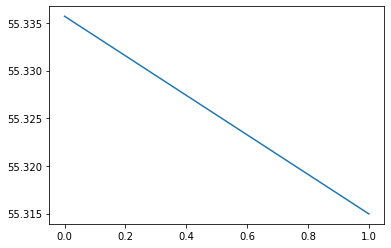

In [113]:
logging.basicConfig(level=logging.DEBUG,filename="kMeans.log",filemode="w")
# m=100 # start 100 times k-means with different initial points
m=2
bestCentroids=None
lowestCost=0x7FFFFFFF
costList=[]
clusterNumber=len(np.unique(label))
lowestCostList=[]
for i in range(m):
    logging.debug("Start "+str(i)+"th k-means")
    centroids=KMeansAlgForIris(features,features.shape[0],clusterNumber,maxSteps=100000,shuffle=False)
    # centroids=KMeansAlgForIris(features,features.shape[0],4,maxSteps=100000,shuffle=False)
    logging.info(str(i+1)+"/"+str(m)+" iteration, Total cost: "+str(TotalCost(features,GetClusters(features,centroids),centroids)))
    costList.append(TotalCost(features,GetClusters(features,centroids),centroids))
    if costList[-1]<lowestCost:
        bestCentroids=centroids
        lowestCost=costList[-1]
        lowestCostList.append(lowestCost)
    # VisualizationInOneGraph(features,bestCentroids)
# plt.plot(costList)
plt.plot(lowestCostList)

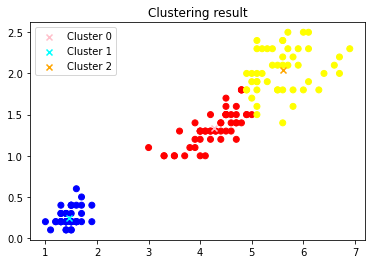

In [114]:
VisualizationInOneGraph(features,bestCentroids)

## Compare with package sklearn

In [115]:
from sklearn.cluster import KMeans

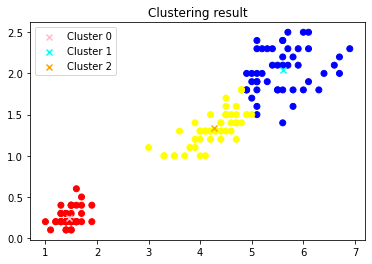

In [116]:
# kmeans=KMeans(n_clusters=3,random_state=0,verbose=2).fit(features)
kmeans=KMeans(n_clusters=3,random_state=0).fit(features)
kmeans.labels_
kmeans.cluster_centers_
VisualizationInOneGraph(features,kmeans.cluster_centers_)

In [117]:
print(np.allclose(np.sort(bestCentroids,axis=0),np.sort(kmeans.cluster_centers_,axis=0)))
print(np.sort(bestCentroids,axis=0)-np.sort(kmeans.cluster_centers_,axis=0))

True
[[ 0.00000000e+00 -6.38378239e-16]
 [ 0.00000000e+00 -4.44089210e-16]
 [-8.88178420e-16 -4.44089210e-16]]


In [118]:
print("Cost of sklearn %f"%TotalCost(features,GetClusters(features,kmeans.cluster_centers_),kmeans.cluster_centers_))
print("Cost of my Kmeans %f"%TotalCost(features,GetClusters(features,bestCentroids),bestCentroids))

Cost of sklearn 55.314970
Cost of my Kmeans 55.314970


In [119]:
bestCentroids

array([[4.26923077, 1.34230769],
       [1.462     , 0.246     ],
       [5.59583333, 2.0375    ]])

In [120]:
kmeans.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])